# Example registration using a single tile

This notebook shows the example usage of registering a single tile.

## Imports

In [17]:
from situr.image import Tile
from situr.registration import PeakFinderDifferenceOfGaussian, IcpRegistrationFunction
from situr.registration import CombinedRegistration, AllChannelRoundRegistration, AcrossRoundChannelRegistration

from matplotlib import pyplot as plt


## Creating the tile

In [18]:
round_list = [
    [['./artificial_img/round_0/channel_0.tif'], ['./artificial_img/round_0/channel_1.tif']], 
    [['./artificial_img/round_1/channel_0.tif'], ['./artificial_img/round_1/channel_1.tif']]
]
tile = Tile(round_list)

## Convert to numpy array if desired

The tile can be converted to a numpy array if you so desire.


In [19]:
tile.to_numpy_array().shape

(2, 2, 1, 2048, 2048)

## Creating a peak finder

In [20]:
peak_finder = PeakFinderDifferenceOfGaussian()

## Visualizing found peaks

To visualize the found peaks we get round 0 and visualize channel 0. This allows us to tweak the peak finder if the results are not satisfactory

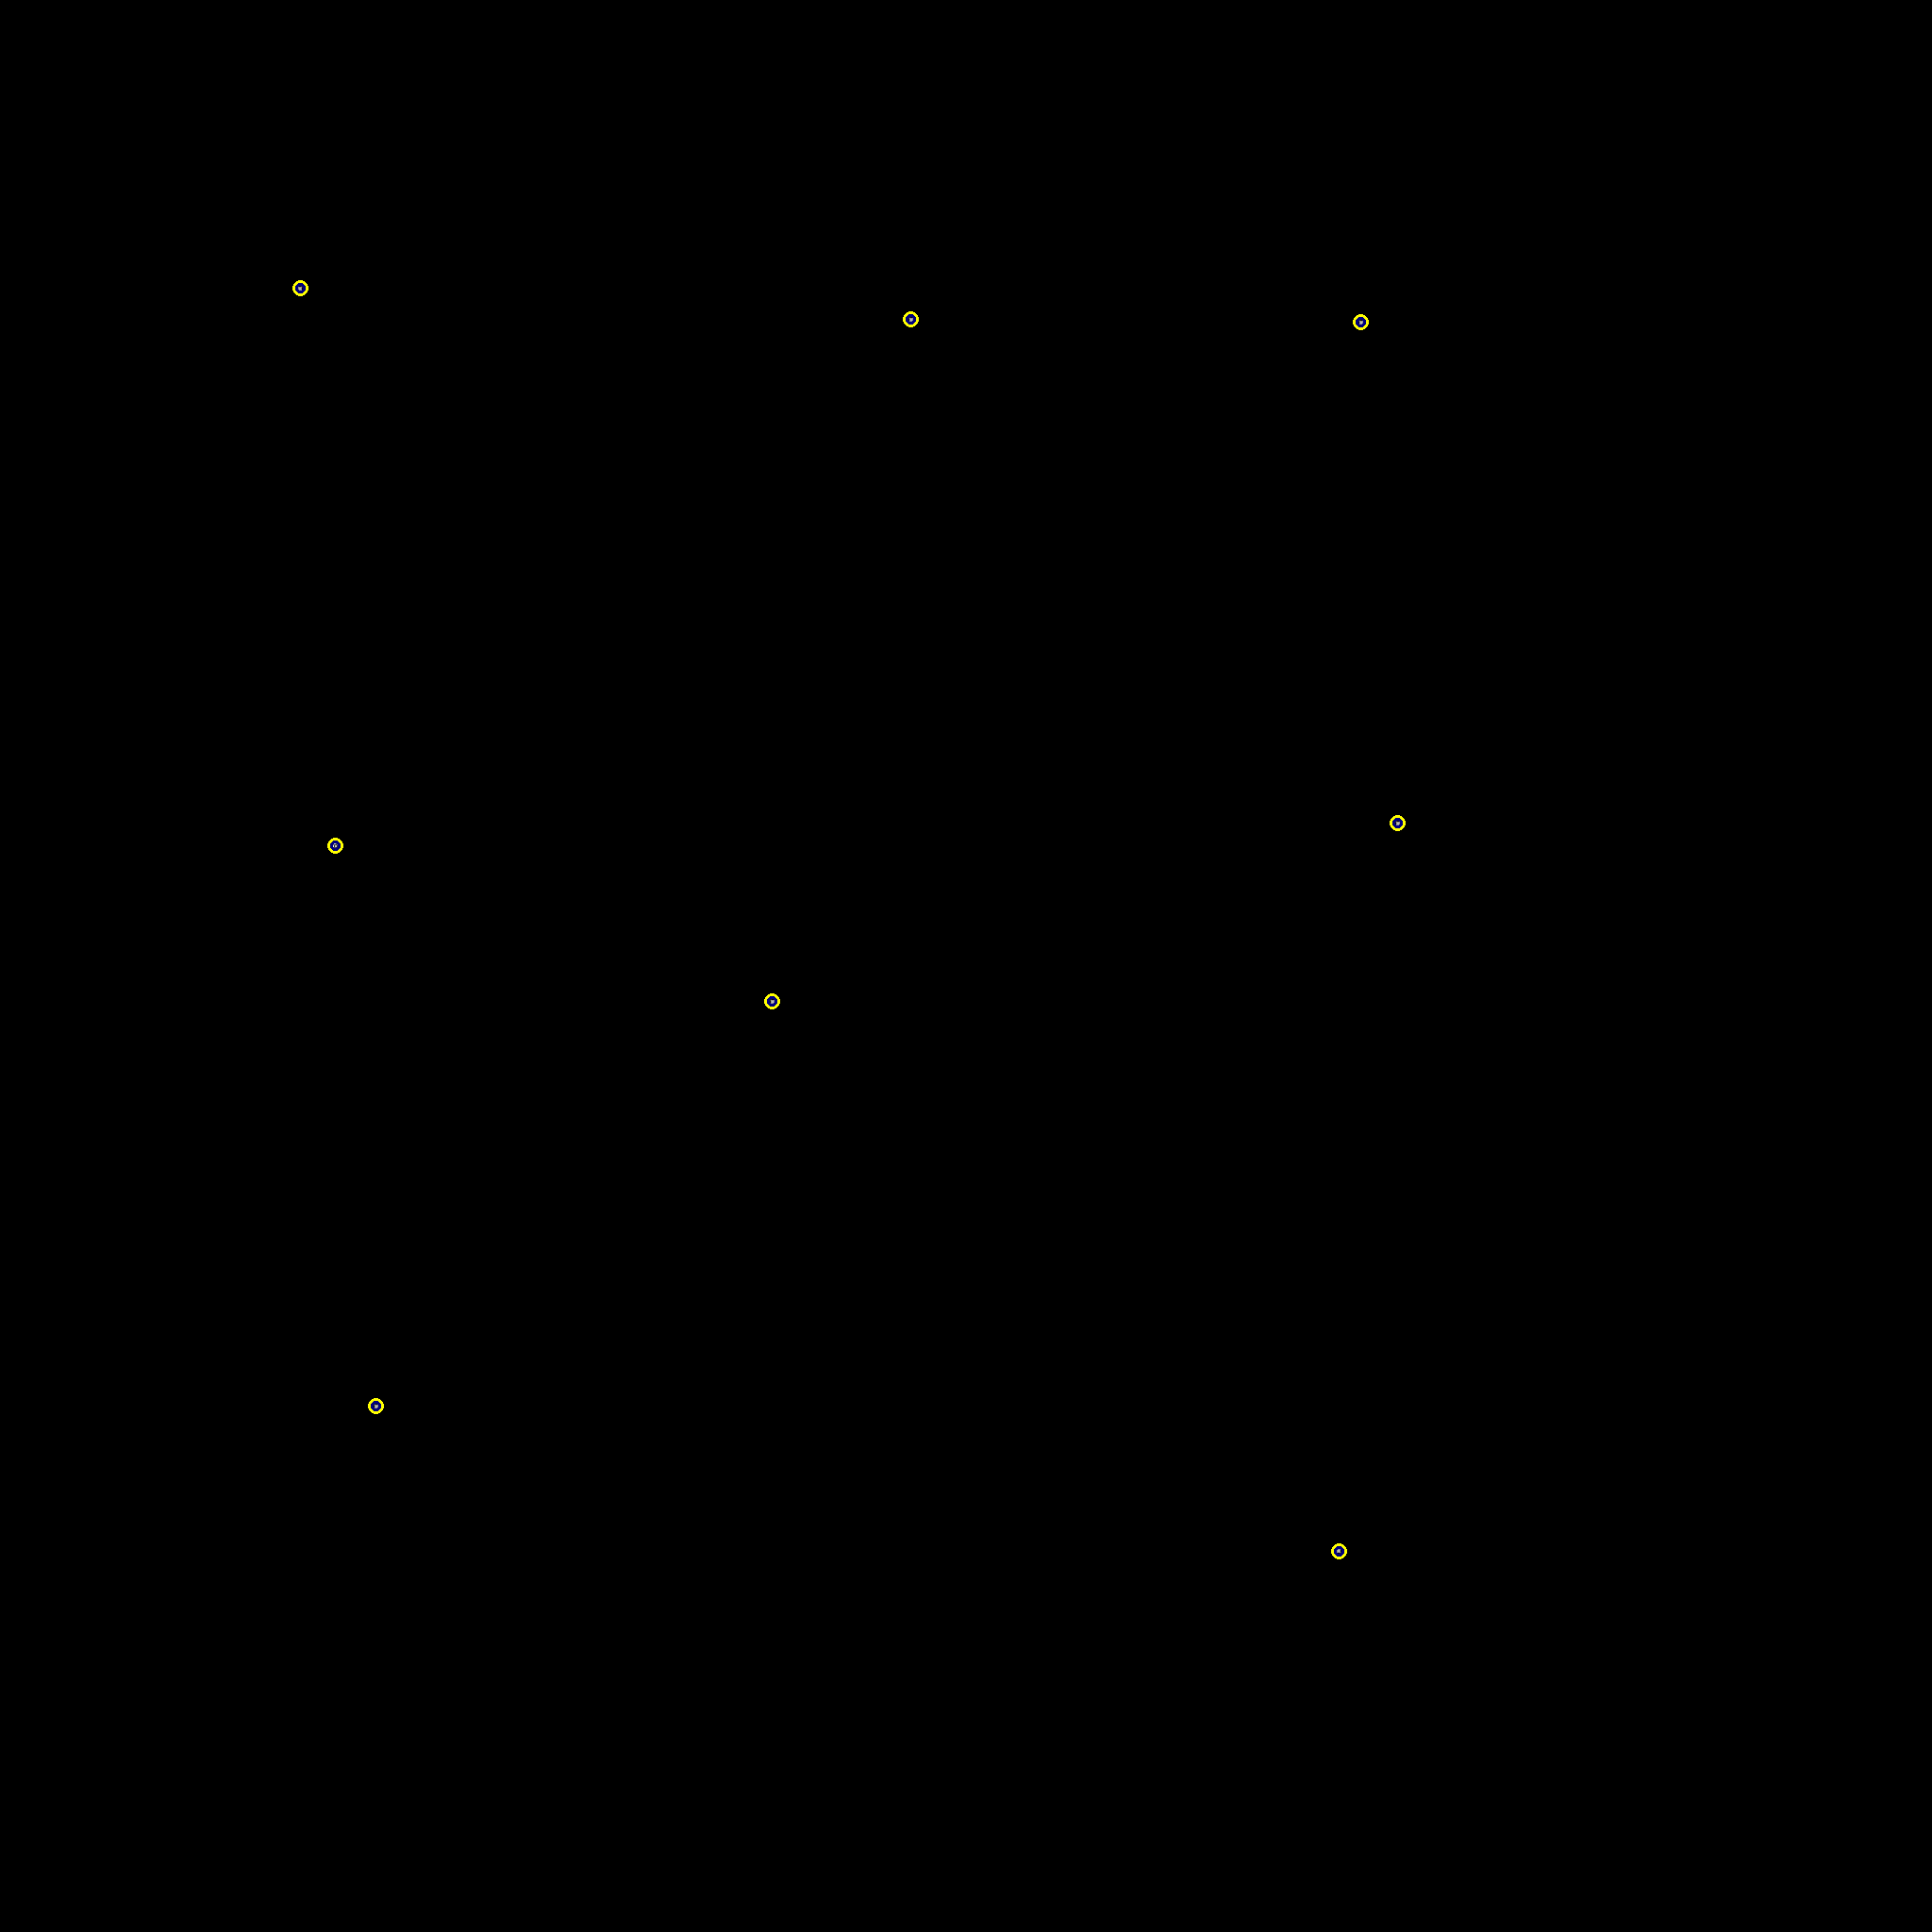

In [21]:
peak_finder.show_channel_peaks(tile.get_round(0), 0, img_show=False)

## Performing the registration

We use a CombinedRegistration to to first register all channels and then register all rounds. The registration here applies the transformations automatically so we should not call it manually afterwards.

In [22]:
registration = CombinedRegistration(
    AllChannelRoundRegistration(registration_function=IcpRegistrationFunction(800),peak_finder=peak_finder), 
    AcrossRoundChannelRegistration(registration_function=IcpRegistrationFunction(150), peak_finder=peak_finder))
registration.do_registration_and_transform(tile)

### Visualizing the result

We show the reference round with it's reference channel, one of its other channels and the modified round to get an idea of the resulting transformaton and how well they are alligned. Also we overlay the peaks in different colours in a scatterplot.


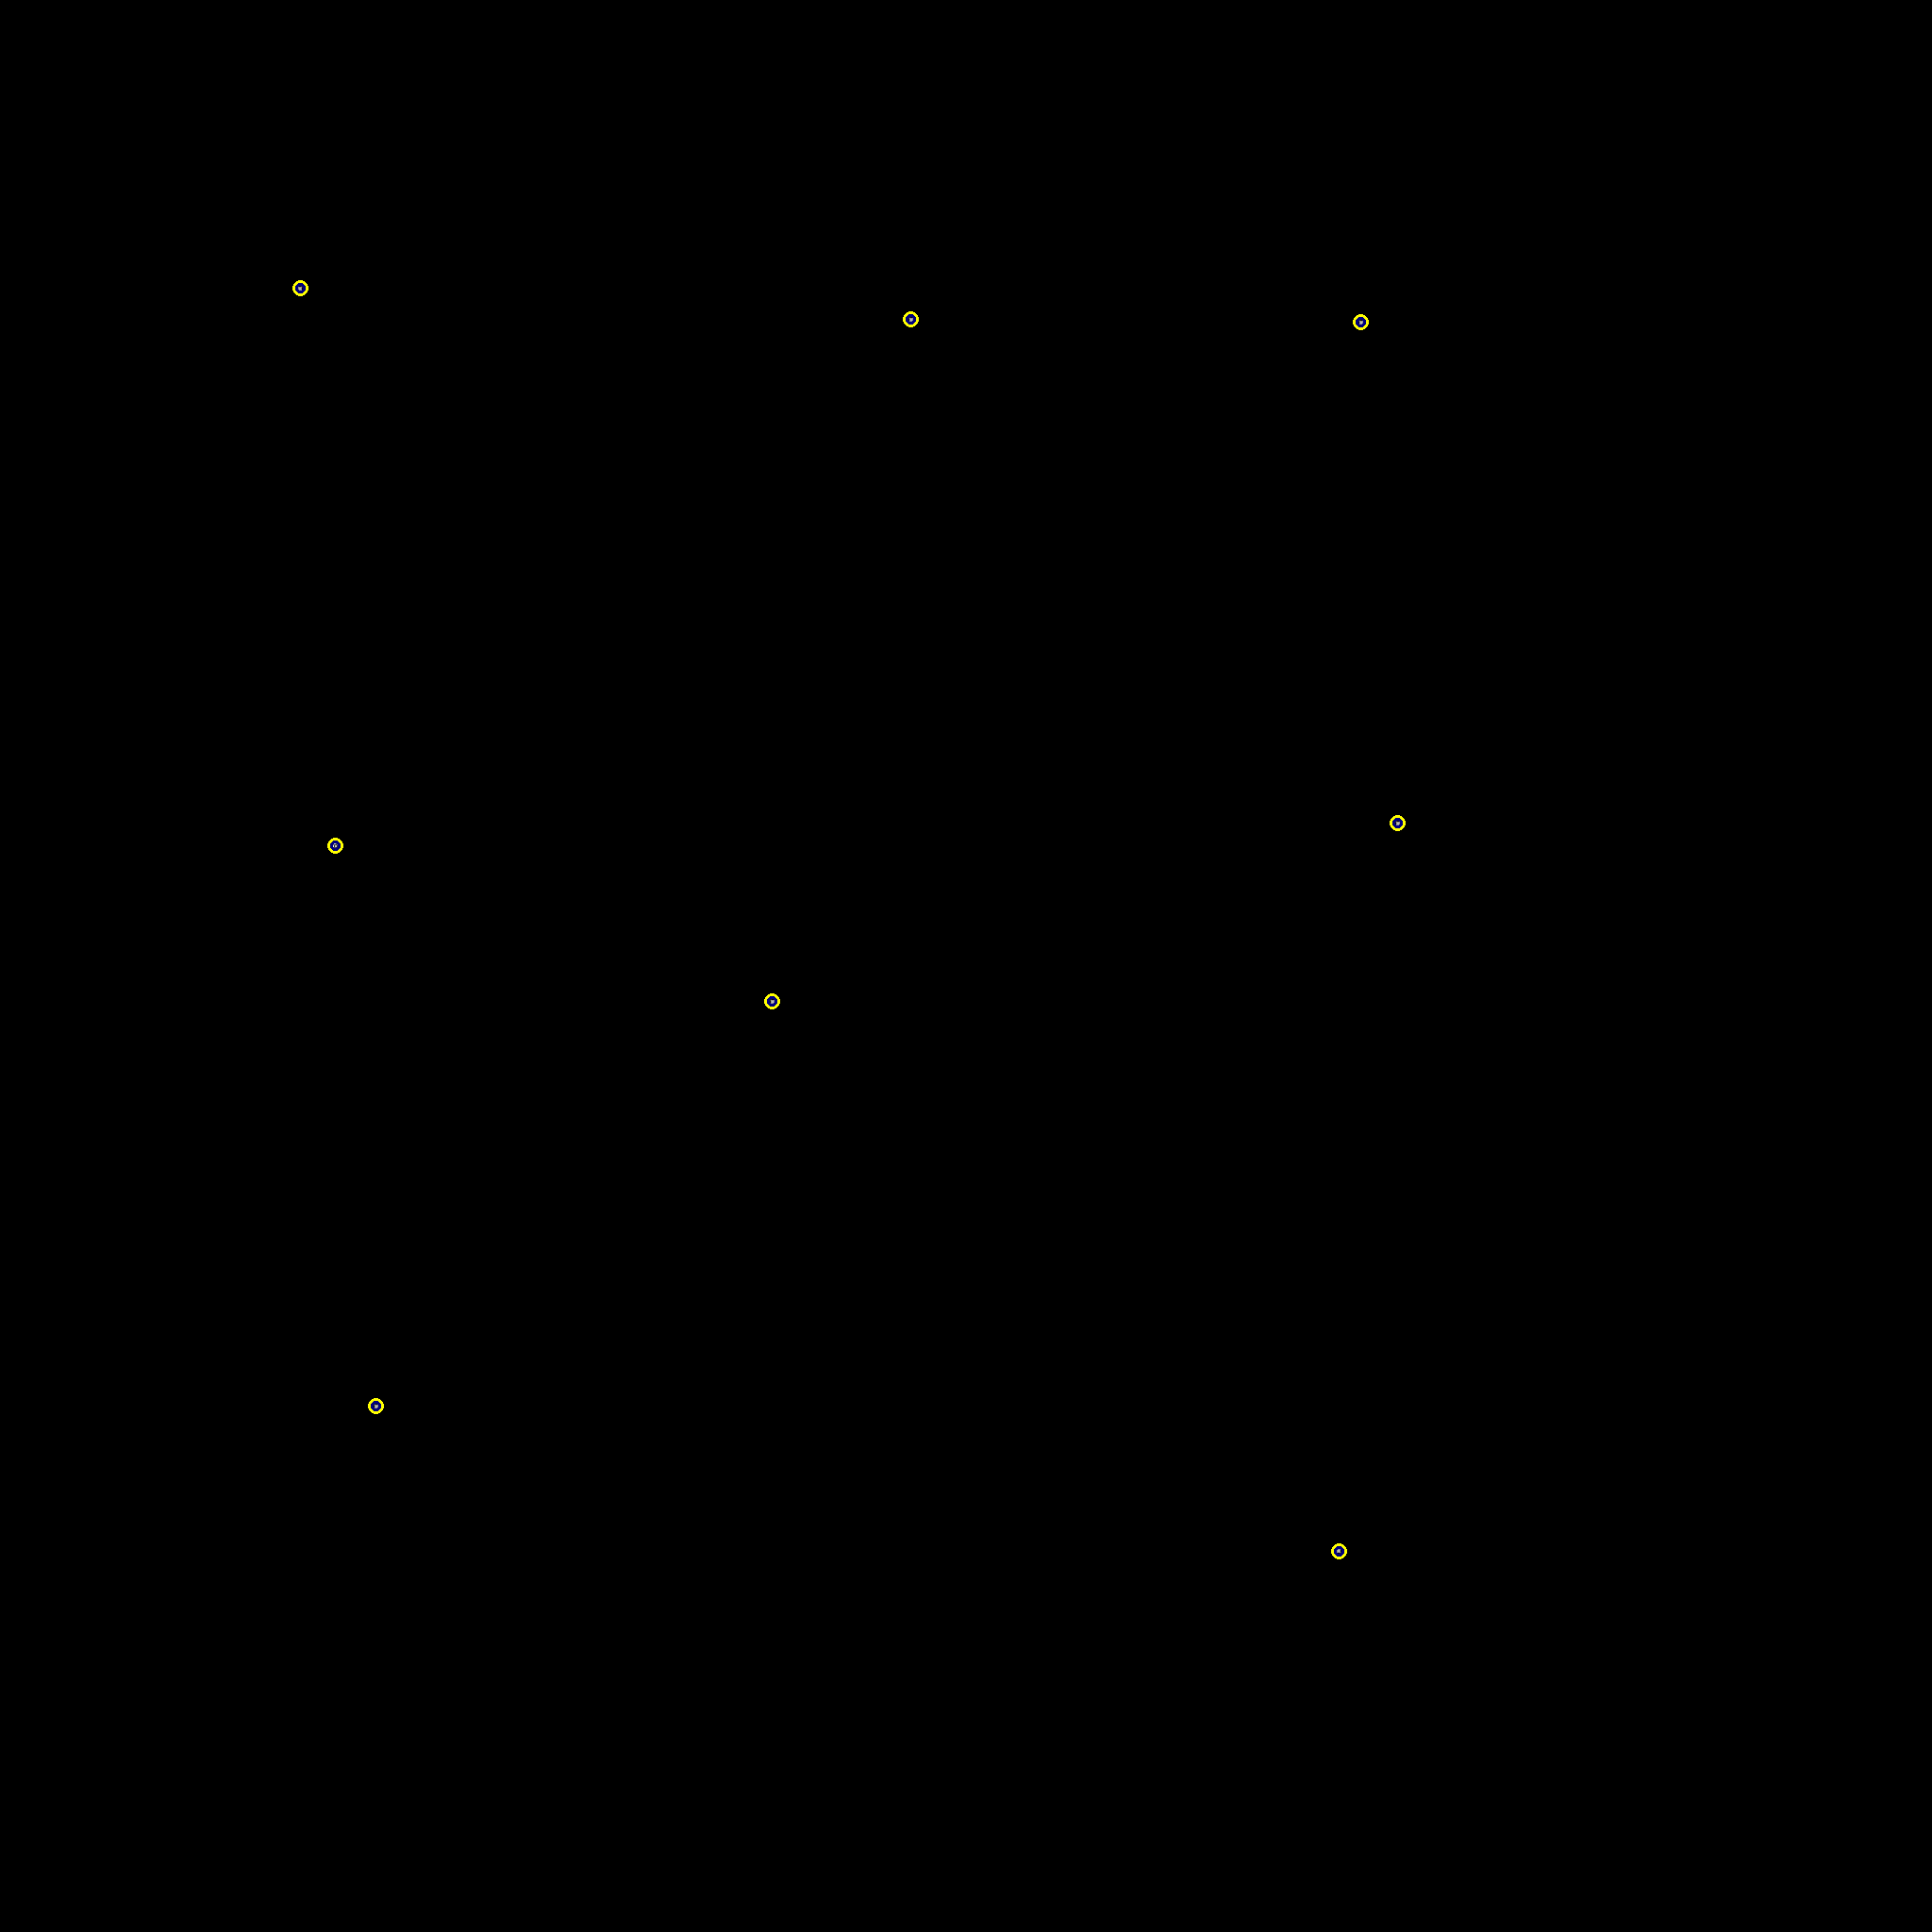

In [23]:
peak_finder.show_channel_peaks(tile.get_round(0), 0, img_show=False)

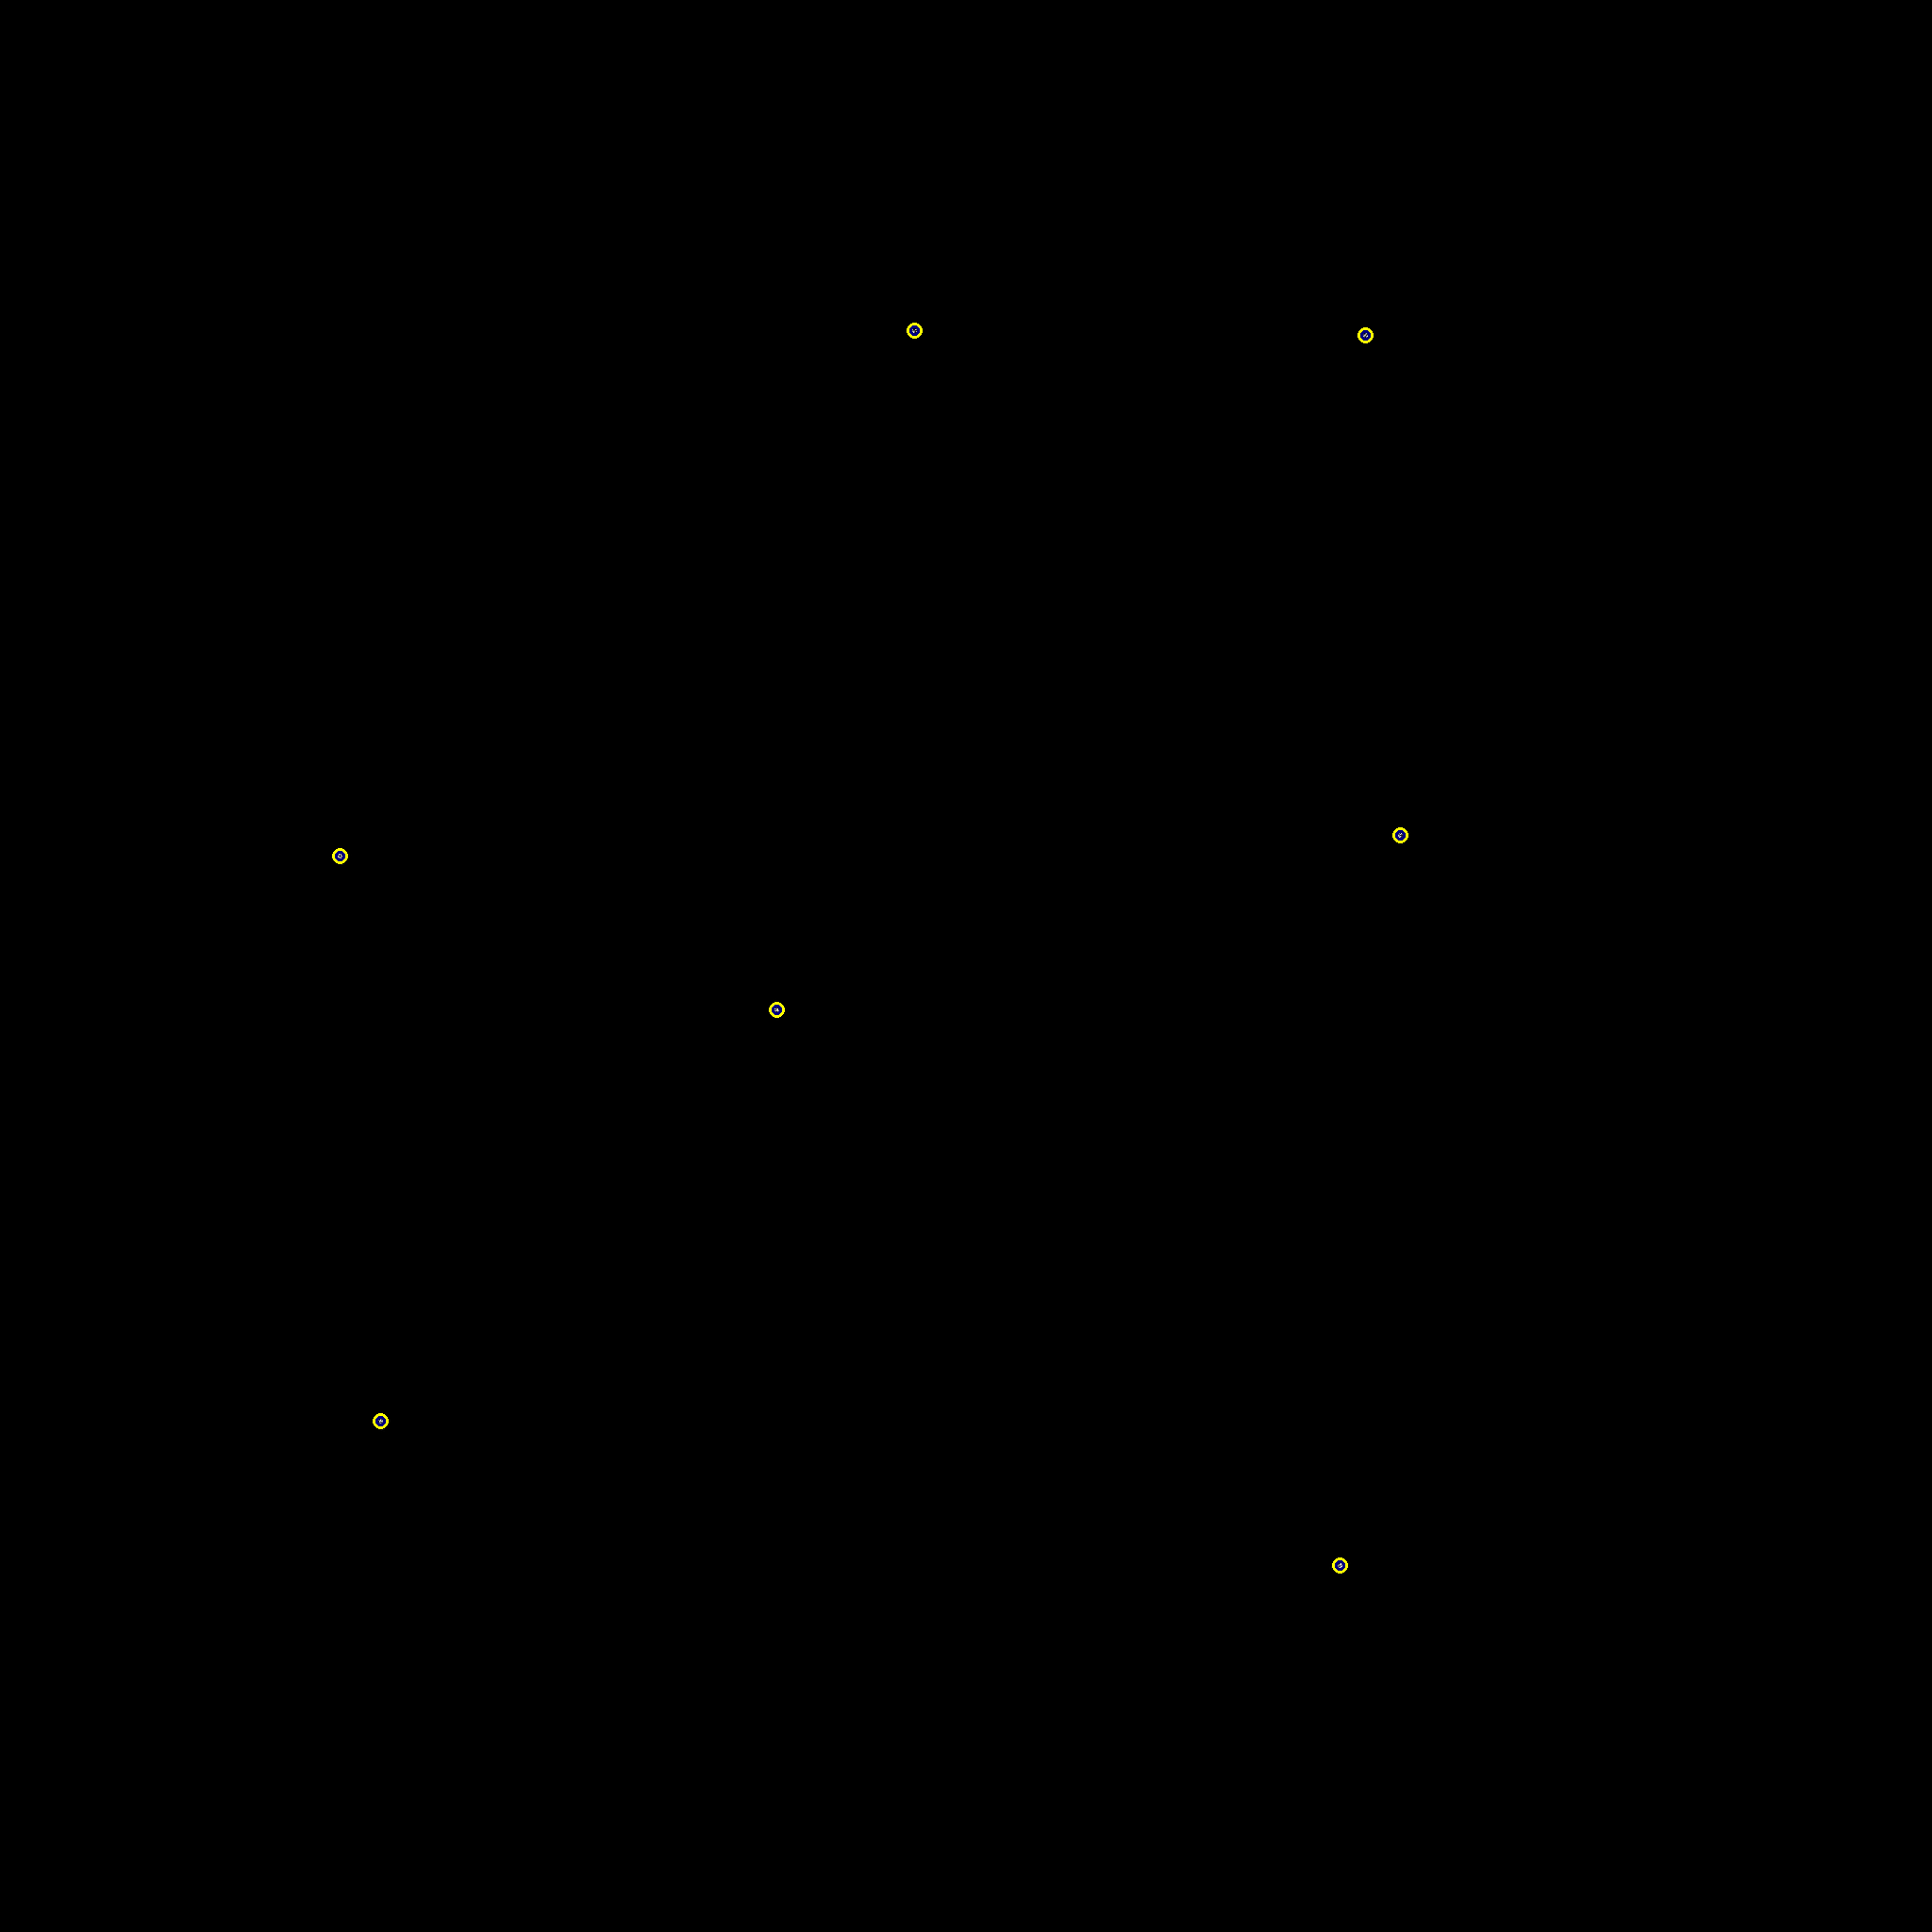

In [24]:
peak_finder.show_channel_peaks(tile.get_round(0), 1, img_show=False)

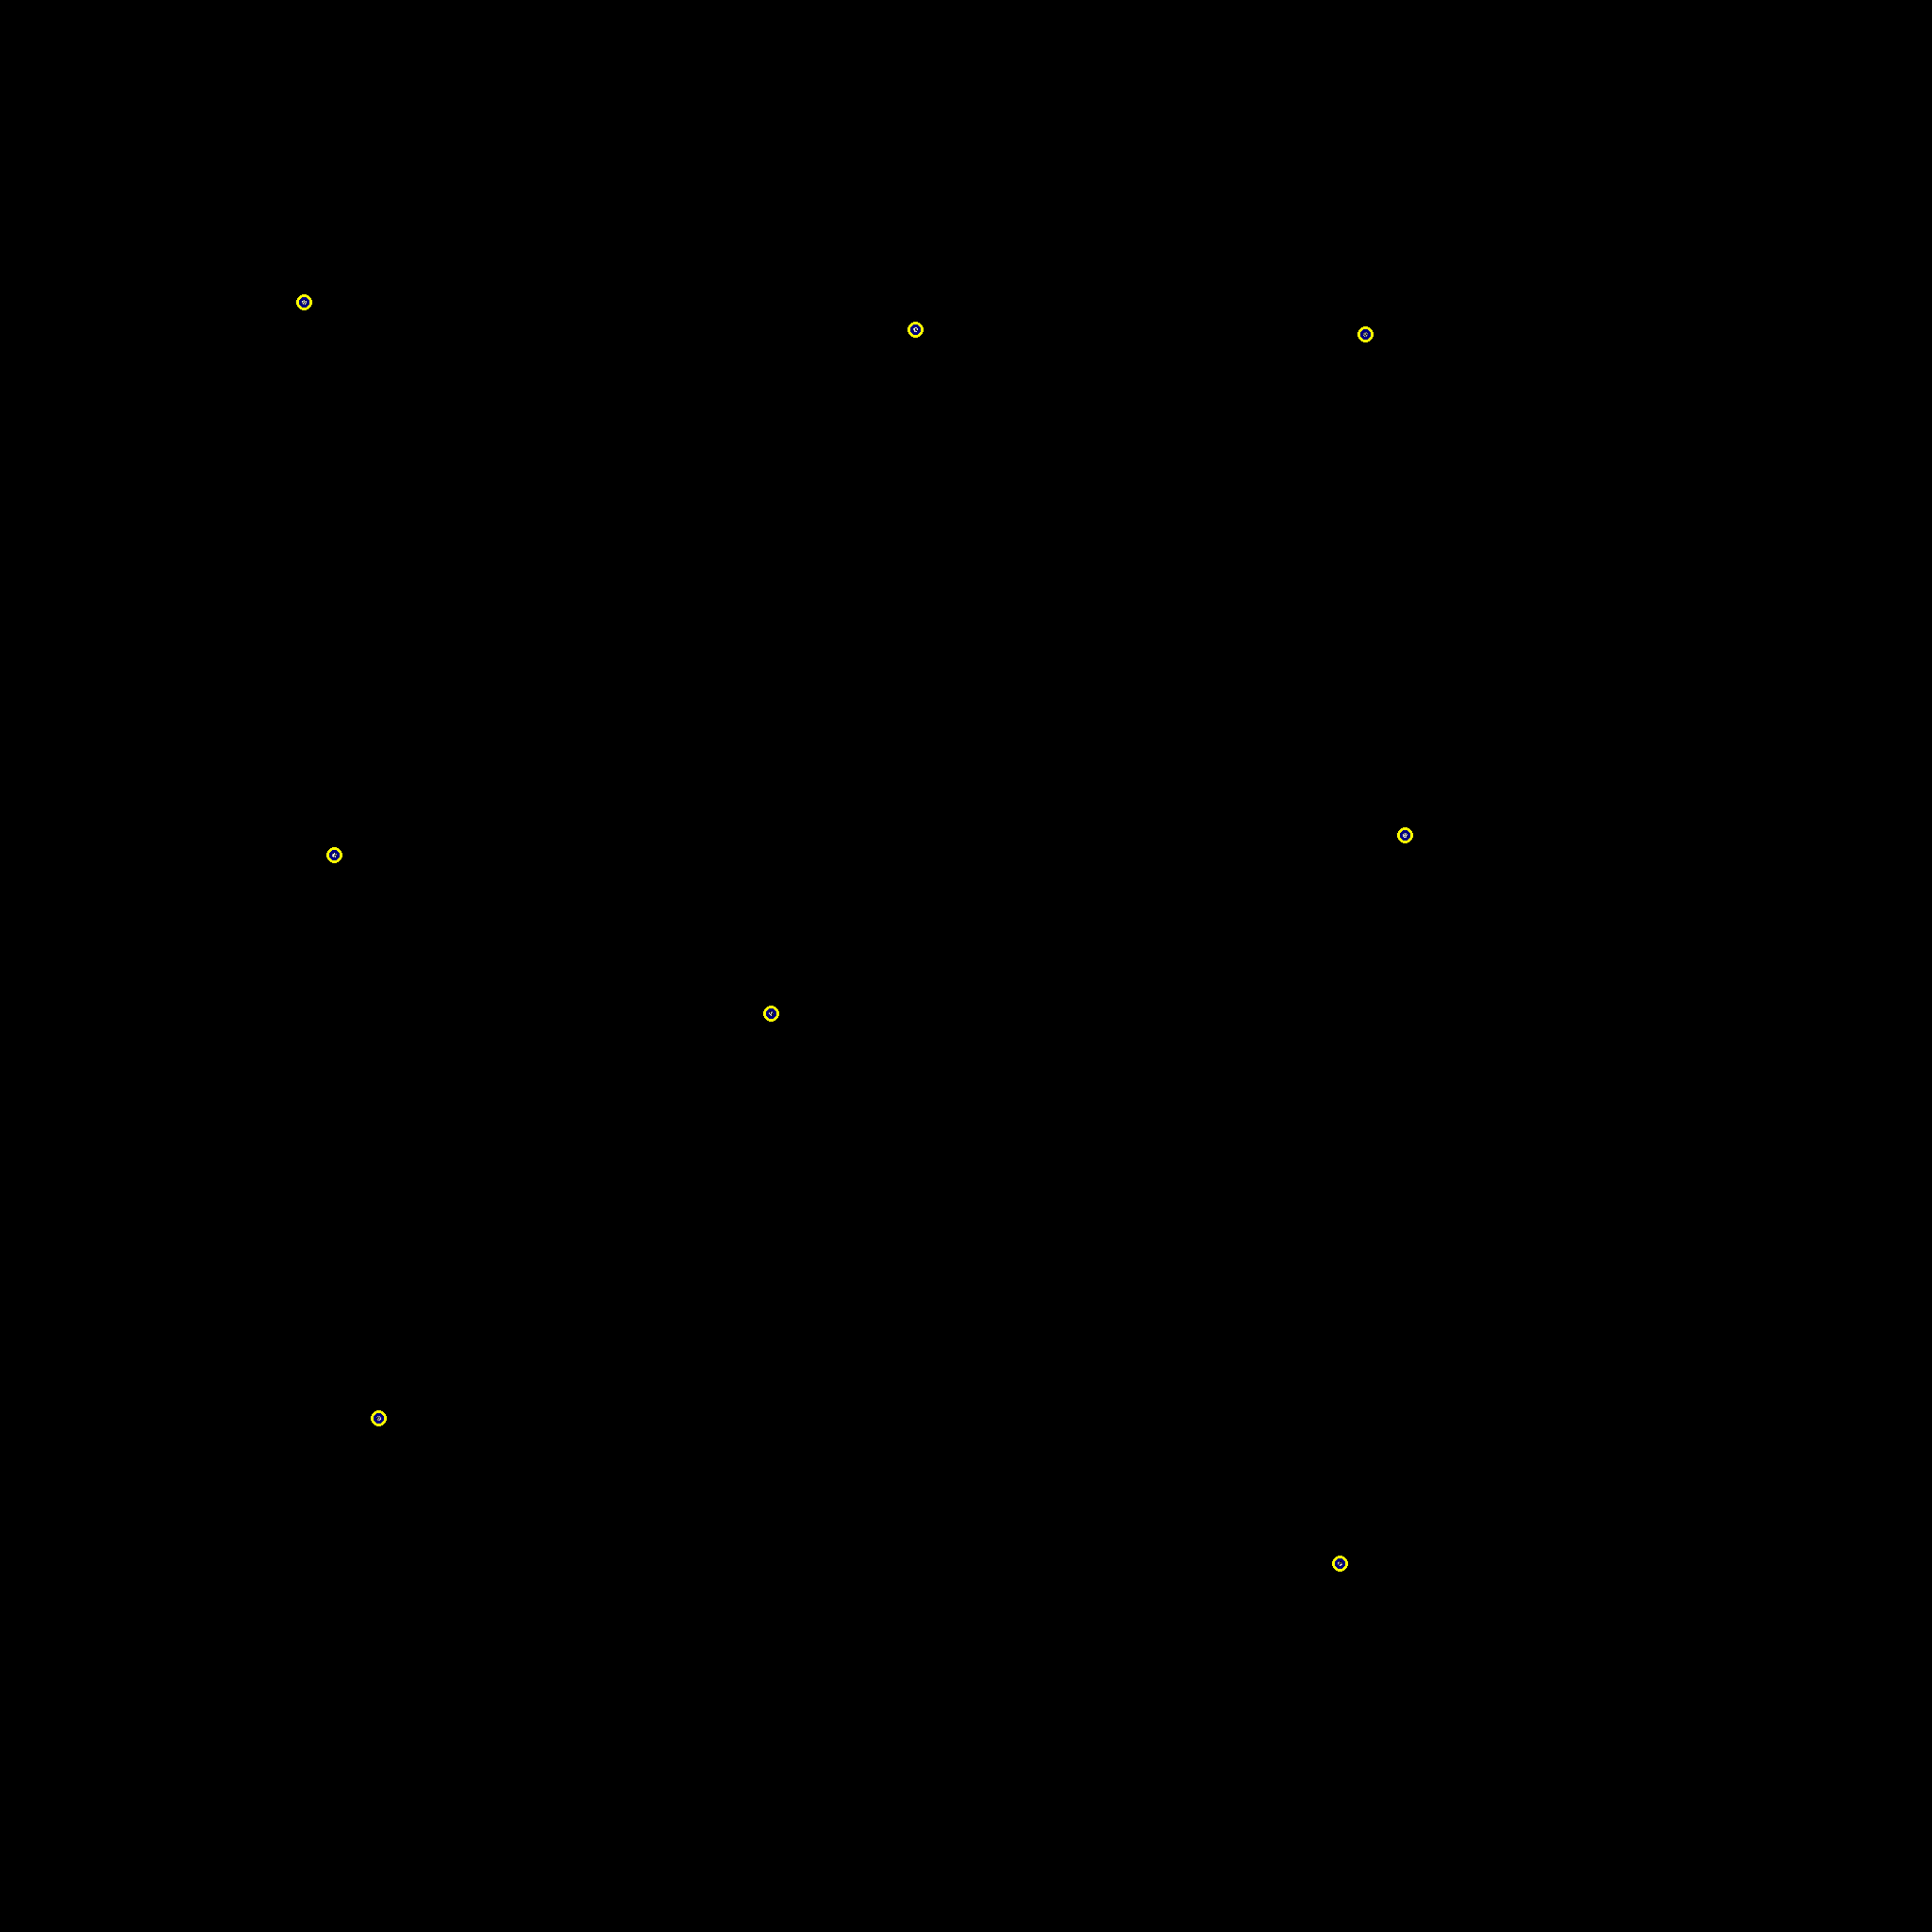

In [25]:
peak_finder.show_channel_peaks(tile.get_round(1), 0, img_show=False)

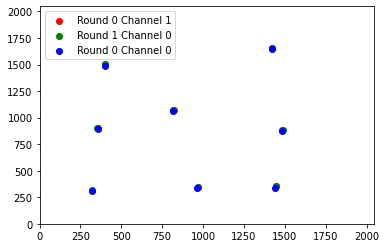

In [26]:
peak_finder.scatterplot_channel_peaks(tile.get_round(0), 1, color='r')
peak_finder.scatterplot_channel_peaks(tile.get_round(1), 0, color='g')
peak_finder.scatterplot_channel_peaks(tile.get_round(0), 0, color='b')
plt.legend(['Round 0 Channel 1', 'Round 1 Channel 0', 'Round 0 Channel 0'])
plt.show()